In [1]:
# !pip install fastai

In [2]:
import os
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path

# Training Data Path

In [3]:
x = '/kaggle/input/house-plant-species/house_plant_species'
path = Path(x)
print(list(path.iterdir()))

[Path('/kaggle/input/house-plant-species/house_plant_species/Orchid'), Path('/kaggle/input/house-plant-species/house_plant_species/Chrysanthemum'), Path('/kaggle/input/house-plant-species/house_plant_species/Venus Flytrap'), Path('/kaggle/input/house-plant-species/house_plant_species/Poinsettia (Euphorbia pulcherrima)'), Path('/kaggle/input/house-plant-species/house_plant_species/Aloe Vera'), Path('/kaggle/input/house-plant-species/house_plant_species/Areca Palm (Dypsis lutescens)'), Path('/kaggle/input/house-plant-species/house_plant_species/Snake plant (Sanseviera)'), Path('/kaggle/input/house-plant-species/house_plant_species/Elephant Ear (Alocasia spp.)'), Path('/kaggle/input/house-plant-species/house_plant_species/Boston Fern (Nephrolepis exaltata)'), Path('/kaggle/input/house-plant-species/house_plant_species/Bird of Paradise (Strelitzia reginae)'), Path('/kaggle/input/house-plant-species/house_plant_species/Hyacinth (Hyacinthus orientalis)'), Path('/kaggle/input/house-plant-spec

# Data Loading for Training

['African Violet (Saintpaulia ionantha)', 'Aloe Vera', 'Anthurium (Anthurium andraeanum)', 'Areca Palm (Dypsis lutescens)', 'Asparagus Fern (Asparagus setaceus)', 'Begonia (Begonia spp.)', 'Bird of Paradise (Strelitzia reginae)', 'Birds Nest Fern (Asplenium nidus)', 'Boston Fern (Nephrolepis exaltata)', 'Calathea', 'Cast Iron Plant (Aspidistra elatior)', 'Chinese Money Plant (Pilea peperomioides)', 'Chinese evergreen (Aglaonema)', 'Christmas Cactus (Schlumbergera bridgesii)', 'Chrysanthemum', 'Ctenanthe', 'Daffodils (Narcissus spp.)', 'Dracaena', 'Dumb Cane (Dieffenbachia spp.)', 'Elephant Ear (Alocasia spp.)', 'English Ivy (Hedera helix)', 'Hyacinth (Hyacinthus orientalis)', 'Iron Cross begonia (Begonia masoniana)', 'Jade plant (Crassula ovata)', 'Kalanchoe', 'Lilium (Hemerocallis)', 'Lily of the valley (Convallaria majalis)', 'Money Tree (Pachira aquatica)', 'Monstera Deliciosa (Monstera deliciosa)', 'Orchid', 'Parlor Palm (Chamaedorea elegans)', 'Peace lily', 'Poinsettia (Euphorbia 

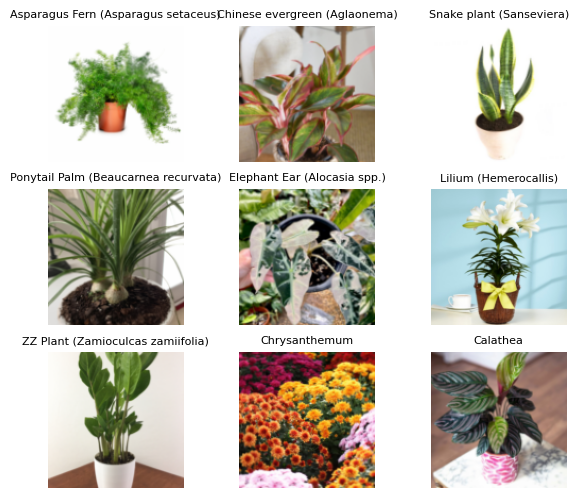

In [4]:
from fastai.vision.augment import aug_transforms

batch_tfms = aug_transforms(
    do_flip=True, flip_vert=False,
    max_rotate=5,       
    max_zoom=1.05,     
    max_lighting=0.1,    
    max_warp=0.0,        #disable warp (CPU-expensive)
    p_affine=0.7, p_lighting=0.5
)

dls = ImageDataLoaders.from_folder(
    path,
    num_workers=2,
    train='.', 
    valid_pct = 0.2, 
    item_tfms=Resize(128),
    batch_tfms=batch_tfms,#make sure correct augmentations
    bs = 64)

#Show random samples from random batch
plt.rcParams['axes.titlesize'] = 8 
dls.show_batch(nrows=3, figsize=(7,6))

#Display classes (unique labels) present in the dataset
print (dls.vocab)
print (len(dls.vocab))

In [5]:
#Loading resnet18, FastAI's pretrained CNN for computer vision
learn = vision_learner(dls, models.resnet18,
                       metrics=[accuracy],
                       model_dir = Path('../kaggle/working'),
                       path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 87.0MB/s]


# Train Model
1. Step 1. Frozen Training
    - backbone is froze, weights don't change
    - only the head trains
    - FastAI does this for 1 epoch automaically
2. Step 2. Fine Tuning
   - backbone is unfrozen, whole network trains together
   - FastAI does this for the number of epochs passed

In [6]:
learn = learn.to_fp16()
learn.fine_tune(10)
# learn.save("resnet18-houseplants")
# learn.export("resnet18-houseplants.pkl")

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,time
0,2.700892,1.537912,0.578750,07:49


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,1.584656,1.106173,0.688077,06:27
1,1.144207,0.858123,0.753331,06:33
2,0.816500,0.751007,0.789546,06:33
3,0.681636,0.707457,0.796037,07:43
4,0.442801,0.654546,0.819952,06:44
5,0.348268,0.622810,0.826785,06:46
6,0.238357,0.608060,0.834643,06:53
7,0.168461,0.601779,0.843526,06:38
8,0.133922,0.579698,0.846942,06:34
9,0.103073,0.576306,0.848992,06:28


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

# Evaluate

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


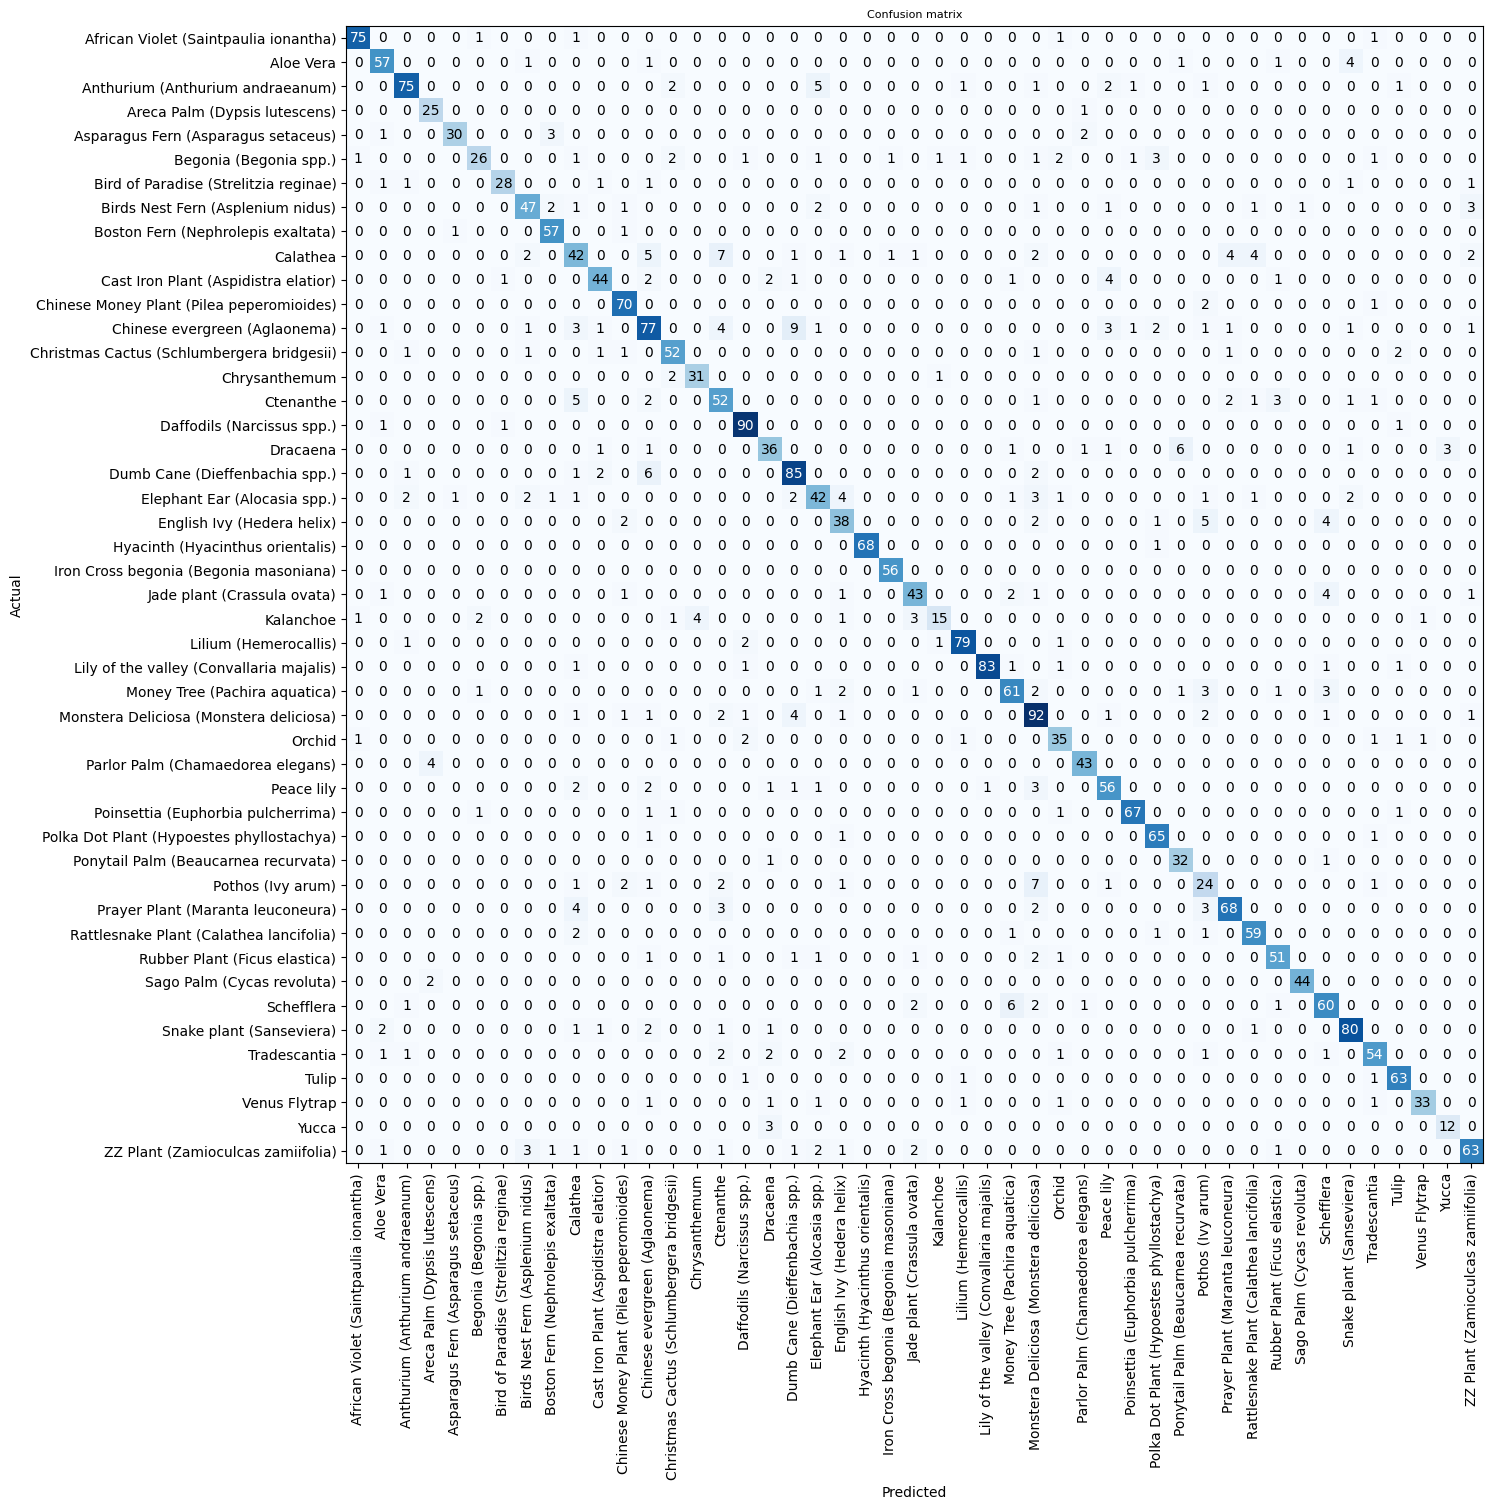

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(15,15), dpi=100)

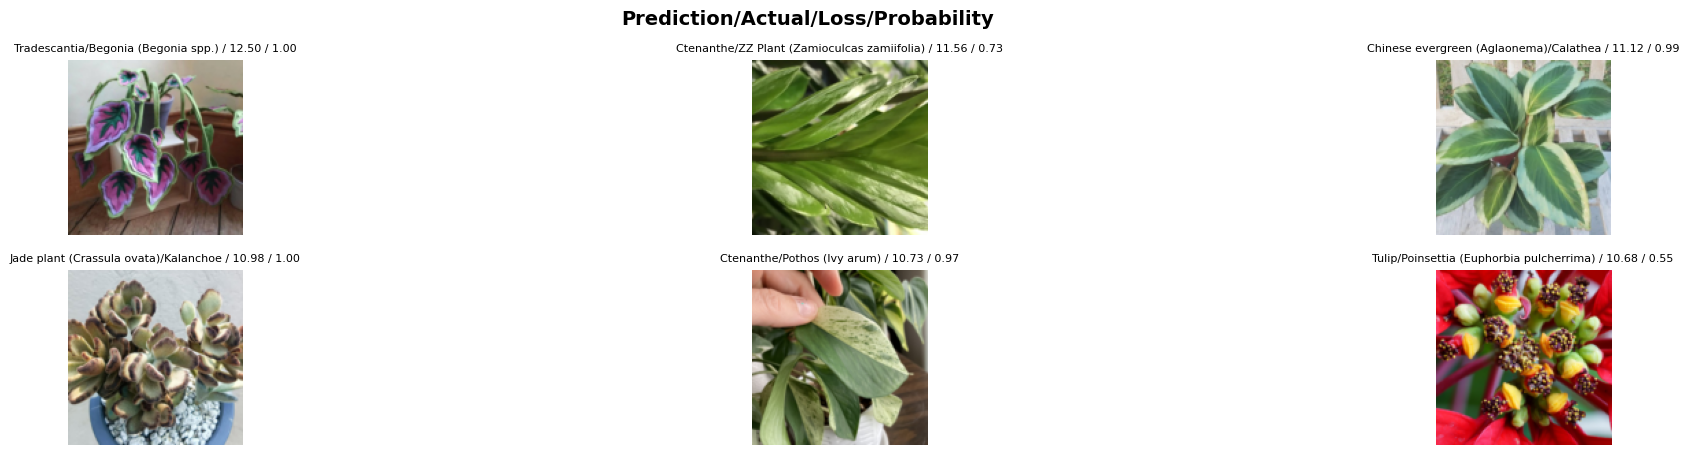

In [8]:
interp.plot_top_losses(6,figsize = (25,5))